#  Project Title: TATA Motors Stock Price Prediction

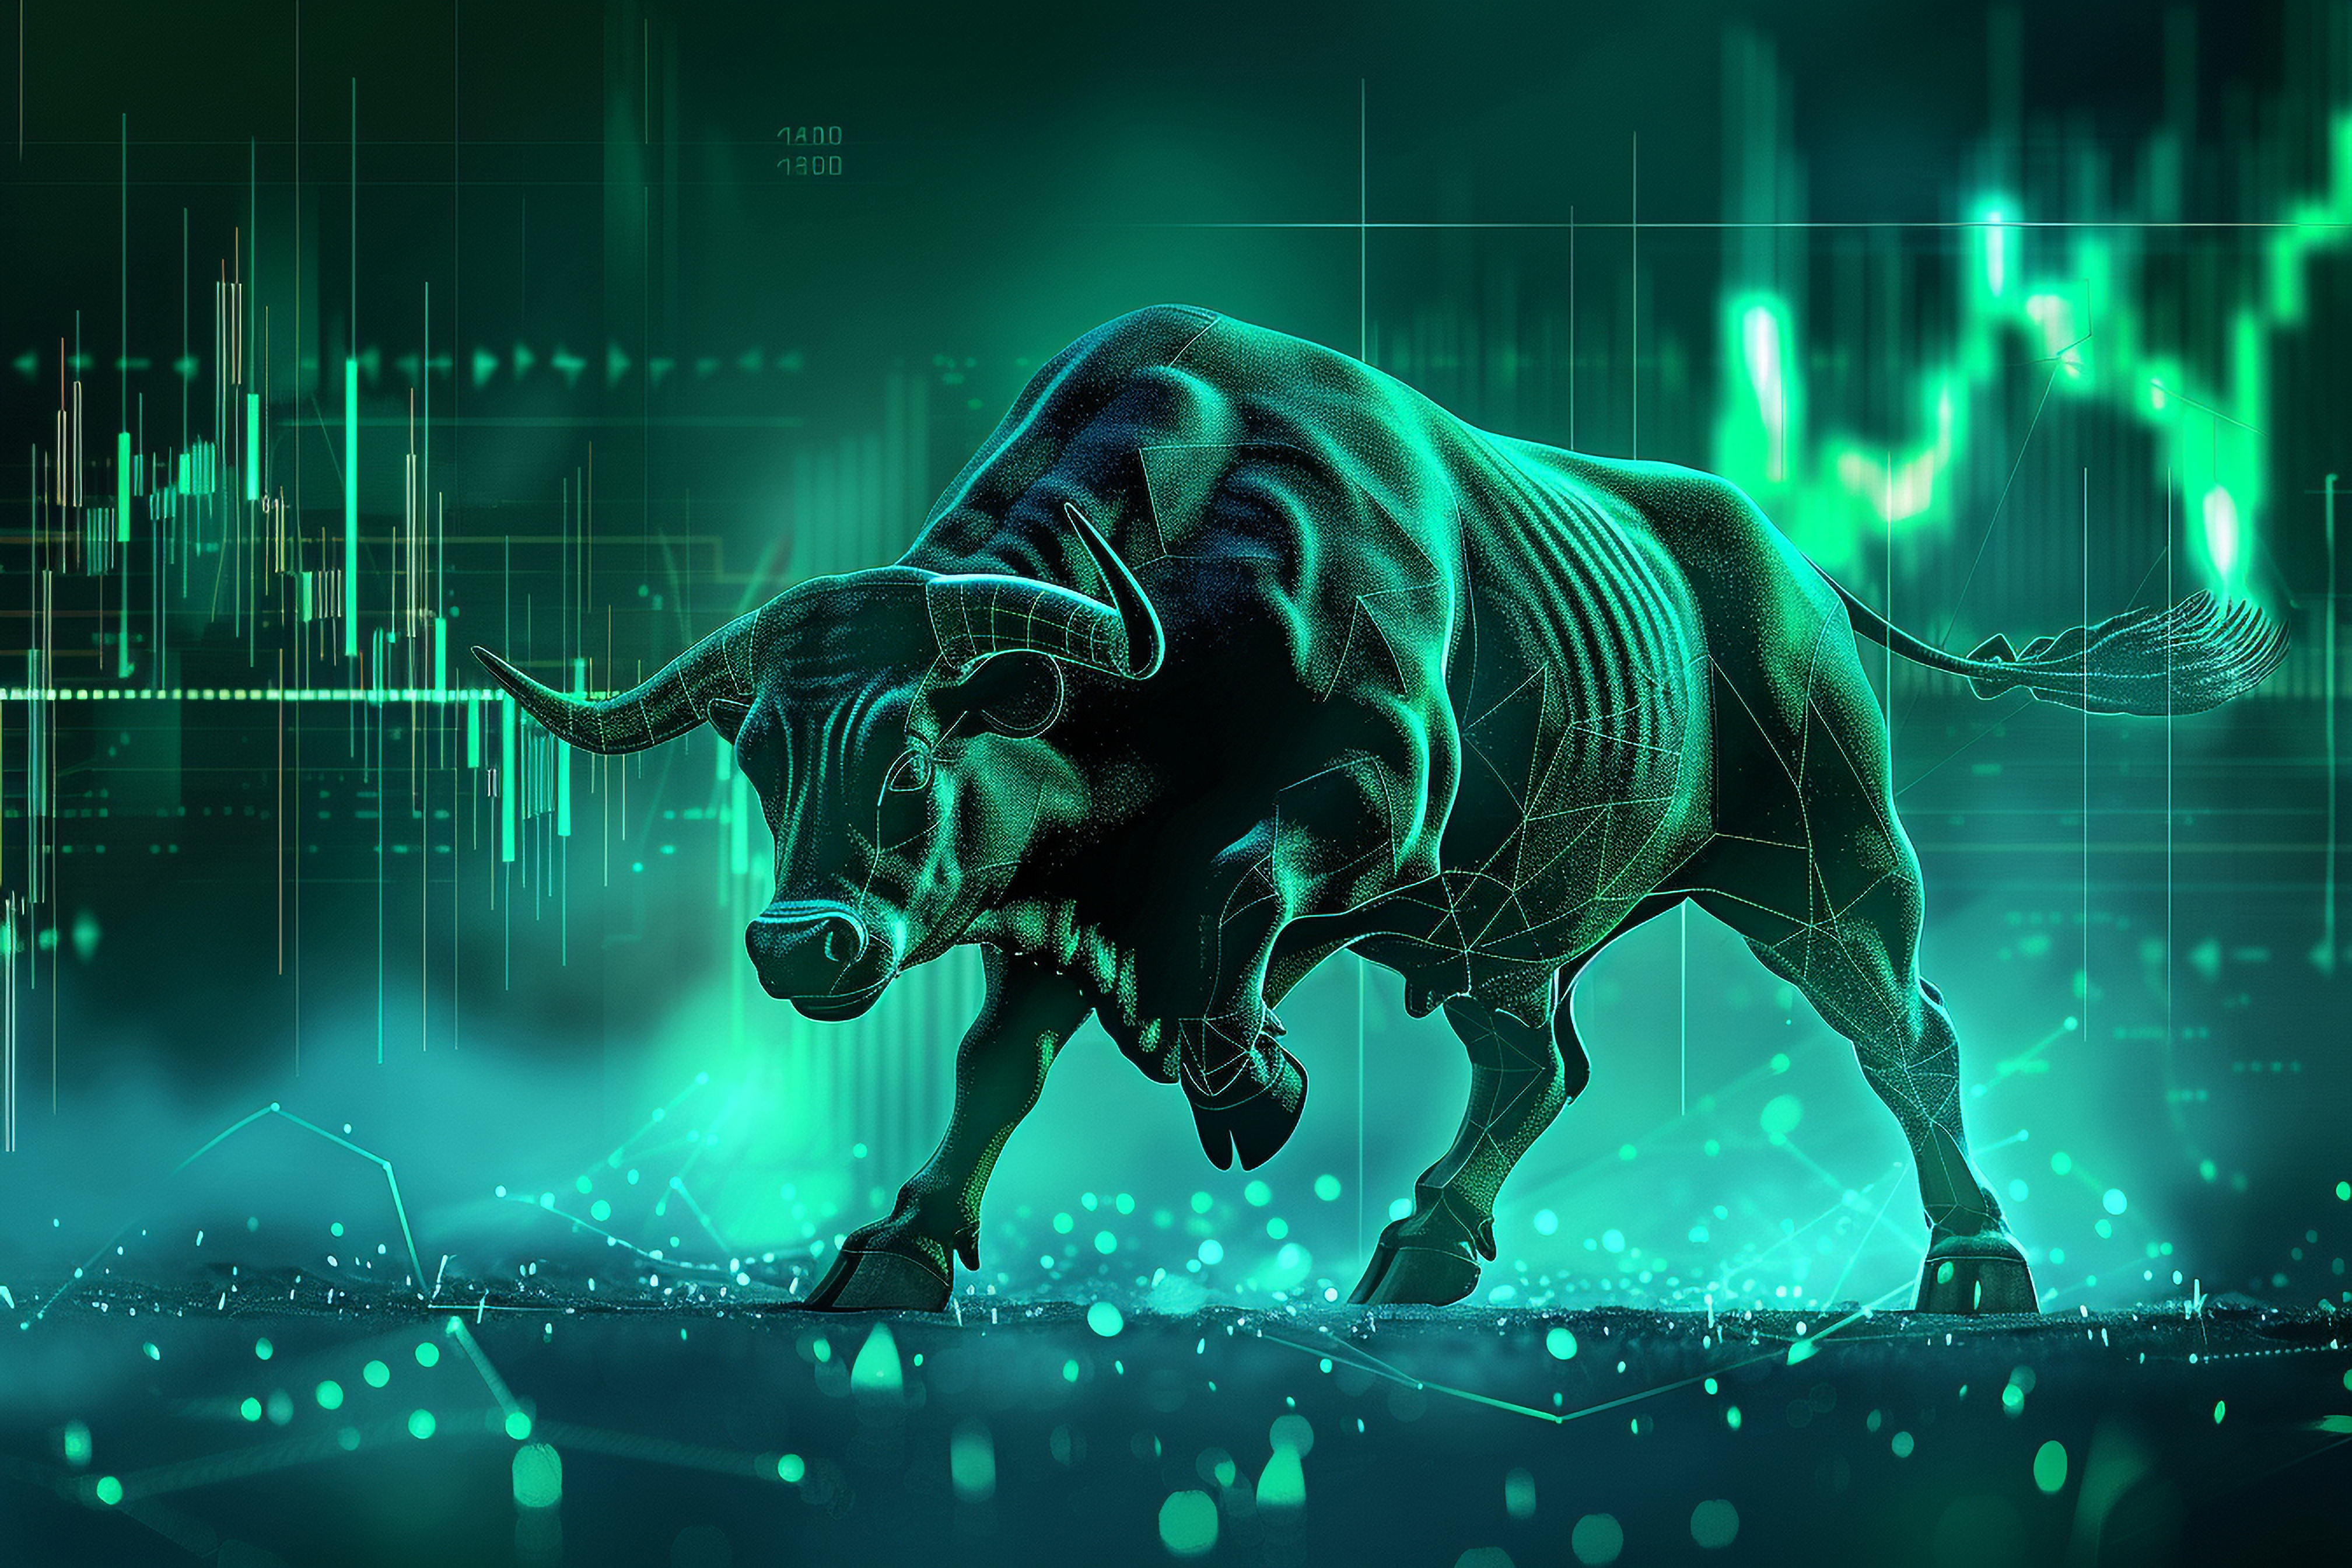

#  Stage 1  
Brainstorm

Stock market prices change every day depending on various market factors. By using historical trading data, we can train a machine learning model to predict the future closing price of a stock.
Here, we use TATA Motors (NSE) data to build a Stock Price Prediction Model.

# Type of Problem

Regression Problem

We aim to predict a continuous numeric value (the Close Price).

# Problem Statement

Develop a machine learning model that predicts the next day’s closing price of TATA Motors stock based on its historical price data and market indicators.

#  Domain

Finance / Stock Market / Predictive Analytics

#  Objective

- To analyze historical stock data from NSE.

- To identify trends and relationships between market factors.

- To build and compare machine learning models that accurately predict the closing price.

# Dataset Information

- Source:	NSE / Kaggle / Yahoo Finance

- Timeline:	1995 – 2025

- Location:	India (NSE – National Stock Exchange).


# Outcome

A regression model that predicts the Close Price for the next trading day.




#  Sample Input and Output
| **Open** | **High** | **Low** | **PrevClose** | **Volume** | **Trades** | **MA_20** | **MA_50** |
| -------- | -------- | ------- | ------------- | ---------- | ---------- | --------- | --------- |
| 925.0    | 932.4    | 918.5   | 920.2         | 2,450,000  | 5,320      | 922.8     | 915.6     |


#  Explanation of Features

| **Feature Name**   | **Type**         | **Explanation**                                                                              | **Impact on Prediction**                                           |
| ------------------ | ---------------- | -------------------------------------------------------------------------------------------- | ------------------------------------------------------------------ |
| **Date**           | Date/Time        | The date when the stock was traded. Used to sort data chronologically (time series).         | Helps in creating time-based trends (e.g., moving averages).       |
| **Symbol**         | Categorical      | The ticker name for the stock — here, “TATAMOTORS.”                                          | Constant for this dataset; can be dropped.                         |
| **Open**           | Numeric          | The stock price at the **start** of the trading day.                                         | Strong indicator of intraday trend; used to predict `Close`.       |
| **High**           | Numeric          | The **highest** price reached by the stock during the trading day.                           | Reflects volatility and buying pressure.                           |
| **Low**            | Numeric          | The **lowest** price reached during the day.                                                 | Reflects selling pressure and market sentiment.                    |
| **Close**          | Numeric (Target) | The **final** price of the stock when the market closed.                                     | 🎯 Target variable (the value we aim to predict).                  |
| **PrevClose**      | Numeric          | The previous day’s closing price.                                                            | Indicates short-term momentum or reversal trend.                   |
| **Volume**         | Numeric          | The **number of shares** traded during the day.                                              | High volume indicates strong investor activity or market movement. |
| **Turnover**       | Numeric          | Total **monetary value** of shares traded = Price × Volume.                                  | Reflects market liquidity and strength of trading activity.        |
| **VWAP**           | Numeric          | **Volume Weighted Average Price** — average price weighted by trade volume.                  | Represents the average price level traders paid during the day.    |
| **Trades**         | Numeric          | Total **number of trades** (transactions) executed that day.                                 | Indicates how active the stock was on that day.                    |
| **Daily_Return_%** | Numeric          | Percentage change in price from the previous close:  [(Close − PrevClose) / PrevClose × 100] | Shows daily performance or volatility.                             |
| **MA_20**          | Numeric          | **20-day Moving Average** of closing price (short-term trend).                               | Used to capture short-term momentum and direction.                 |
| **MA_50**          | Numeric          | **50-day Moving Average** of closing price (medium-term trend).                              | Used to identify long-term support or resistance trends.           |


#  Algorithms to be Used and Compared

| **Algorithm**                   | **Type**            | **Purpose / Reason for Use**                                                 |
| ------------------------------- | ------------------- | ---------------------------------------------------------------------------- |
| **Linear Regression**           | Baseline Model      | Establishes a simple linear relationship between input and target.           |
| **Decision Tree Regressor**     | Non-linear          | Captures non-linear patterns and relationships.                              |
| **Random Forest Regressor**     | Ensemble (Bagging)  | Combines multiple trees to reduce overfitting and improve performance.       |
| **Gradient Boosting Regressor** | Ensemble (Boosting) | Sequentially builds models that correct previous errors for higher accuracy. |
| **XGBoost Regressor**           | Advanced Ensemble   | Highly efficient and accurate model widely used for financial predictions.   |

Evaluation Metrics:

- Mean Absolute Error (MAE)

- Root Mean Squared Error (RMSE)

- R² Score


# Initial EDA (Exploratory Data Analysis)


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
url="https://raw.githubusercontent.com/gopisaba007/TATA-Motors-Stock-Price-Prediction/refs/heads/main/TATAMOTORS_NSE_1995-2025.csv"

data=pd.read_csv(url)

In [3]:
# Coverting to Data Frame
df = pd.DataFrame(data)
df

Unnamed: 0        Date      Symbol    Open    High     Low   Close  \
0          223.0  1995-01-02  TATAMOTORS  517.50  524.70  517.50  524.20   
1          224.0  1995-01-03  TATAMOTORS  518.00  520.00  515.00  515.00   
2          225.0  1995-01-04  TATAMOTORS  515.00  515.00  515.00  515.00   
3          226.0  1995-01-05  TATAMOTORS  480.00  480.00  480.00  480.00   
4          227.0  1995-01-06  TATAMOTORS  495.00  501.00  495.00  498.70   
...          ...         ...         ...     ...     ...     ...     ...   
7800      7660.0  2025-08-12  TATAMOTORS  651.10  660.95  650.80  654.10   
7801      7661.0  2025-08-13  TATAMOTORS  657.20  667.00  656.65  663.75   
7802      7662.0  2025-08-14  TATAMOTORS  666.00  666.55  657.70  664.60   
7803      7663.0  2025-08-18  TATAMOTORS  677.00  685.00  672.90  676.00   
7804      7664.0  2025-08-19  TATAMOTORS  676.75  703.35  673.10  700.25   

      PrevClose      Volume      Turnover    VWAP    Trades  Daily_Return_%  \
0        522.00      1100.0  5.735300e+05  521.39       NaN        0.421456   
1        524.20      1500.0  7.754500e+05  516.97       NaN       -1.755055   
2        515.00       300.0  1.545000e+05  515.00       NaN        0.000000   
3        515.00        50.0  2.400000e+04  480.00       NaN       -6.796117   
4        480.00       200.0  9.955000e+04  497.75       NaN        3.895833   
...         ...         ...           ...     ...       ...             ...   
7800     653.75  11212223.0  7.348231e+09  655.38  223425.0        0.053537   
7801     654.10   7557556.0  5.016113e+09  663.72  133862.0        1.475310   
7802     663.75   6250494.0  4.140530e+09  662.43  115002.0        0.128060   
7803     664.60  14226172.0  9.655303e+09  678.70  165366.0        1.715317   
7804     676.00  19440384.0  1.351303e+10  695.10  282726.0        3.587278   

         MA_20    MA_50  
0          NaN      NaN  
1          NaN      NaN  
2          NaN      NaN  
3          NaN      NaN  
4          NaN      NaN  
...        ...      ...  
7800  669.3700  683.496  
7801  668.6075  682.568  
7802  667.7525  681.640  
7803  667.5400  680.804  
7804  668.1800  680.164  

[7805 rows x 15 columns]

In [4]:
# first 5 rows
df.head()

Unnamed: 0        Date      Symbol   Open   High    Low  Close  PrevClose  \
0       223.0  1995-01-02  TATAMOTORS  517.5  524.7  517.5  524.2      522.0   
1       224.0  1995-01-03  TATAMOTORS  518.0  520.0  515.0  515.0      524.2   
2       225.0  1995-01-04  TATAMOTORS  515.0  515.0  515.0  515.0      515.0   
3       226.0  1995-01-05  TATAMOTORS  480.0  480.0  480.0  480.0      515.0   
4       227.0  1995-01-06  TATAMOTORS  495.0  501.0  495.0  498.7      480.0   

   Volume  Turnover    VWAP  Trades  Daily_Return_%  MA_20  MA_50  
0  1100.0  573530.0  521.39     NaN        0.421456    NaN    NaN  
1  1500.0  775450.0  516.97     NaN       -1.755055    NaN    NaN  
2   300.0  154500.0  515.00     NaN        0.000000    NaN    NaN  
3    50.0   24000.0  480.00     NaN       -6.796117    NaN    NaN  
4   200.0   99550.0  497.75     NaN        3.895833    NaN    NaN

In [5]:
# last few rows
df.tail()

Unnamed: 0        Date      Symbol    Open    High     Low   Close  \
7800      7660.0  2025-08-12  TATAMOTORS  651.10  660.95  650.80  654.10   
7801      7661.0  2025-08-13  TATAMOTORS  657.20  667.00  656.65  663.75   
7802      7662.0  2025-08-14  TATAMOTORS  666.00  666.55  657.70  664.60   
7803      7663.0  2025-08-18  TATAMOTORS  677.00  685.00  672.90  676.00   
7804      7664.0  2025-08-19  TATAMOTORS  676.75  703.35  673.10  700.25   

      PrevClose      Volume      Turnover    VWAP    Trades  Daily_Return_%  \
7800     653.75  11212223.0  7.348231e+09  655.38  223425.0        0.053537   
7801     654.10   7557556.0  5.016113e+09  663.72  133862.0        1.475310   
7802     663.75   6250494.0  4.140530e+09  662.43  115002.0        0.128060   
7803     664.60  14226172.0  9.655303e+09  678.70  165366.0        1.715317   
7804     676.00  19440384.0  1.351303e+10  695.10  282726.0        3.587278   

         MA_20    MA_50  
7800  669.3700  683.496  
7801  668.6075  682.568  
7802  667.7525  681.640  
7803  667.5400  680.804  
7804  668.1800  680.164

In [6]:
# data shape
df.shape

(7805, 15)

In [7]:
# data size
df.size

117075

In [8]:
# data desceibe
df.describe()

Unnamed: 0         Open         High          Low        Close  \
count  7804.000000  7804.000000  7804.000000  7804.000000  7804.000000   
mean   3901.500000   426.908105   433.624885   419.198526   426.156516   
std    2252.965083   260.410952   263.730360   256.249596   259.926045   
min       0.000000    58.000000    60.700000    57.550000    58.800000   
25%    1950.750000   215.950000   220.187500   209.437500   215.375000   
50%    3901.500000   399.000000   404.525000   392.175000   397.800000   
75%    5852.250000   535.000000   544.000000   526.262500   535.312500   
max    7803.000000  1361.000000  1382.000000  1347.000000  1365.150000   

         PrevClose        Volume      Turnover         VWAP        Trades  \
count  7804.000000  7.804000e+03  7.804000e+03  7804.000000  3.617000e+03   
mean    426.042984  1.008443e+07  3.360758e+09   426.517865  1.641804e+05   
std     259.923227  1.998049e+07  5.490162e+09   259.954308  1.309842e+05   
min       0.000000  5.000000e+01  2.400000e+04    59.240000  3.434000e+03   
25%     215.375000  1.365342e+06  4.126361e+08   215.487500  8.477600e+04   
50%     397.800000  4.114132e+06  1.913436e+09   398.320000  1.263780e+05   
75%     535.312500  9.874223e+06  3.942626e+09   535.530000  1.993340e+05   
max    1365.150000  3.905778e+08  9.853175e+10  1362.150000  1.517162e+06   

       Daily_Return_%        MA_20        MA_50  
count     7804.000000  7785.000000  7755.000000  
mean              inf   425.784914   425.176591  
std               NaN   258.907945   257.163936  
min        -80.866780    64.885000    69.538000  
25%         -1.418222   215.867500   219.790000  
50%          0.013436   398.915000   401.483000  
75%          1.490380   533.560000   525.136500  
max               inf  1316.080000  1270.157000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7804 non-null   float64
 1   Date            7804 non-null   object 
 2   Symbol          7804 non-null   object 
 3   Open            7804 non-null   float64
 4   High            7804 non-null   float64
 5   Low             7804 non-null   float64
 6   Close           7804 non-null   float64
 7   PrevClose       7804 non-null   float64
 8   Volume          7804 non-null   float64
 9   Turnover        7804 non-null   float64
 10  VWAP            7804 non-null   float64
 11  Trades          3617 non-null   float64
 12  Daily_Return_%  7804 non-null   float64
 13  MA_20           7785 non-null   float64
 14  MA_50           7755 non-null   float64
dtypes: float64(13), object(2)
memory usage: 914.8+ KB


Check for Missing values

In [10]:
df.isnull().sum()

Unnamed: 0           1
Date                 1
Symbol               1
Open                 1
High                 1
Low                  1
Close                1
PrevClose            1
Volume               1
Turnover             1
VWAP                 1
Trades            4188
Daily_Return_%       1
MA_20               20
MA_50               50
dtype: int64

Check for Duplicate values

In [11]:
df.duplicated().sum()

np.int64(0)

# **STAGE-2**

# EDA (Visualization) and Pre-processing

Data cleaning & preprossesing

Handling Missing Values

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
from sklearn.impute import SimpleImputer
import numpy as np

print("Missing Values Before Imputation:\n", df.isnull().sum())

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Example: fill numeric columns with median, categorical (if any) with mode
num_imputer = SimpleImputer(strategy='median')
df[df.select_dtypes(include=np.number).columns] = num_imputer.fit_transform(df.select_dtypes(include=np.number))

print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values Before Imputation:
 Unnamed: 0           1
Date                 1
Symbol               1
Open                 1
High                 1
Low                  1
Close                1
PrevClose            1
Volume               1
Turnover             1
VWAP                 1
Trades            4188
Daily_Return_%       1
MA_20               20
MA_50               50
dtype: int64
Missing Values After Imputation:
 Unnamed: 0        0
Date              1
Symbol            1
Open              0
High              0
Low               0
Close             0
PrevClose         0
Volume            0
Turnover          0
VWAP              0
Trades            0
Daily_Return_%    0
MA_20             0
MA_50             0
dtype: int64


Remove Duplicates

In [14]:
print("Duplicates before removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after removal:", df.duplicated().sum())


Duplicates before removal: 0
Duplicates after removal: 0


In [15]:
df.columns

Index(['Unnamed: 0', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'PrevClose', 'Volume', 'Turnover', 'VWAP', 'Trades', 'Daily_Return_%',
       'MA_20', 'MA_50'],
      dtype='object')

In [16]:
df.rename(columns={'Unnamed: 0': 'Serial number'}, inplace=True)

In [17]:
df.columns

Index(['Serial number', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'PrevClose', 'Volume', 'Turnover', 'VWAP', 'Trades', 'Daily_Return_%',
       'MA_20', 'MA_50'],
      dtype='object')

# Outlier Detection (Before Removal)

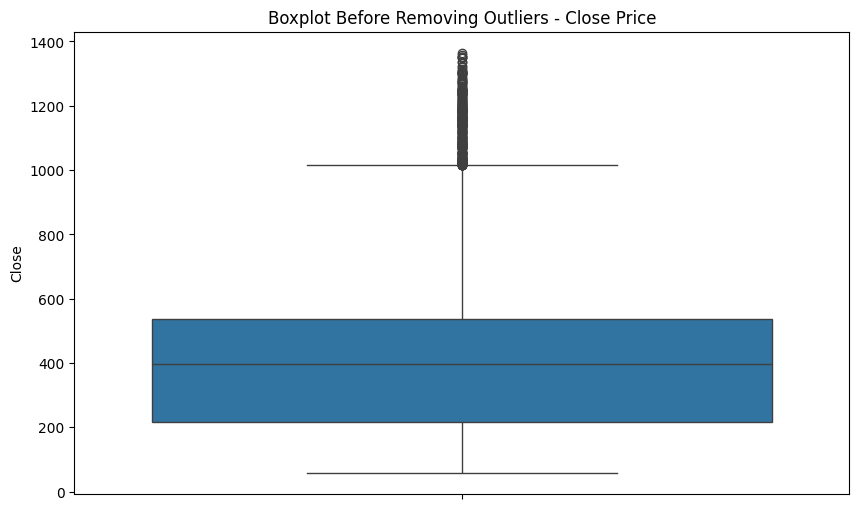

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Close'])
plt.title("Boxplot Before Removing Outliers - Close Price")
plt.show()


# Remove Outliers (IQR Method)

In [19]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_out = df[(df['Close'] >= lower) & (df['Close'] <= upper)]

print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_out.shape)


Shape before removing outliers: (7805, 15)
Shape after removing outliers: (7543, 15)


# Boxplot After Removing Outliers

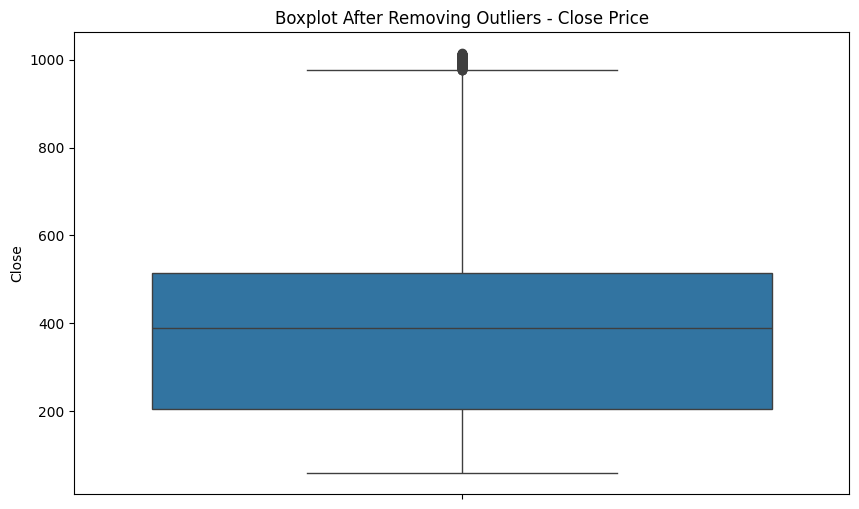

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(df_out['Close'])
plt.title("Boxplot After Removing Outliers - Close Price")
plt.show()


# Check Skewness (Before)

In [21]:
from scipy.stats import skew

In [22]:

numeric_cols = df_out.select_dtypes(include=np.number).columns
for col in numeric_cols:
    print(f"Skewness of {col}: {skew(df_out[col].dropna()):.2f}")

Skewness of Serial number: 0.01
Skewness of Open: 0.63
Skewness of High: 0.63
Skewness of Low: 0.63
Skewness of Close: 0.63
Skewness of PrevClose: 0.63
Skewness of Volume: 5.78
Skewness of Turnover: 6.02
Skewness of VWAP: 0.63
Skewness of Trades: 5.14
Skewness of Daily_Return_%: -2.64
Skewness of MA_20: 0.65
Skewness of MA_50: 0.68


Visualize Skewness (Before)

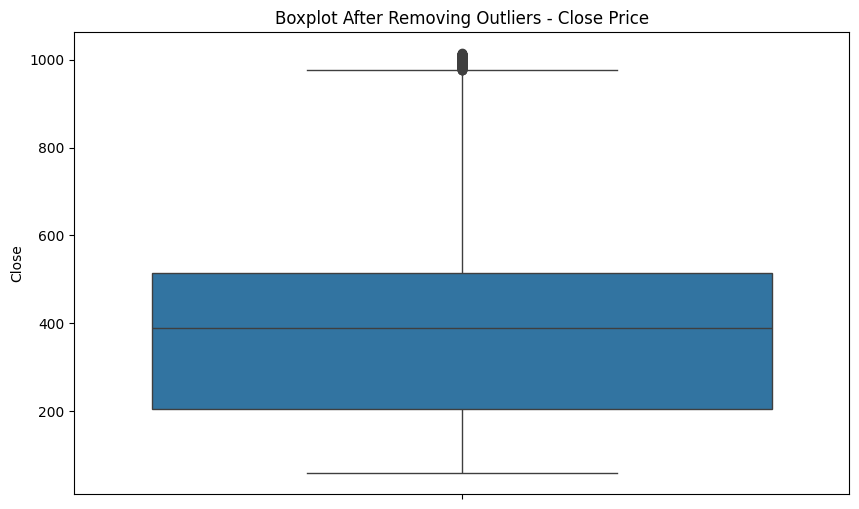

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(df_out['Close'])
plt.title("Boxplot After Removing Outliers - Close Price")
plt.show()


Handle Skewness (Log Transformation Example)

In [24]:
df_skew = df_out.copy()
df_skew['Volume'] = np.log1p(df_skew['Volume'])


Visualize Skewness (After)

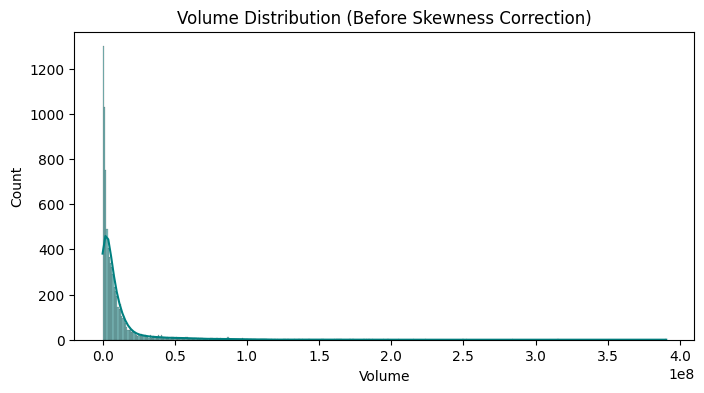

In [25]:
plt.figure(figsize=(8,4))
sns.histplot(df['Volume'], kde=True, color='teal')
plt.title("Volume Distribution (Before Skewness Correction)")
plt.show()


Handle Skewness (Log Transformation Example)

In [26]:
df_skew = df_out.copy()
df_skew['Volume'] = np.log1p(df_skew['Volume'])


Visualize Skewness (After)

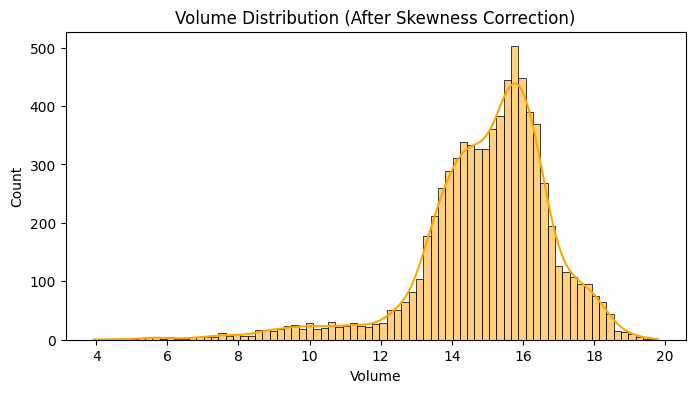

In [27]:
plt.figure(figsize=(8,4))
sns.histplot(df_skew['Volume'], kde=True, color='orange')
plt.title("Volume Distribution (After Skewness Correction)")
plt.show()


#  Univariate Analysis (3–5 Plots + Interpretation)

1).**Close Price Distribution**

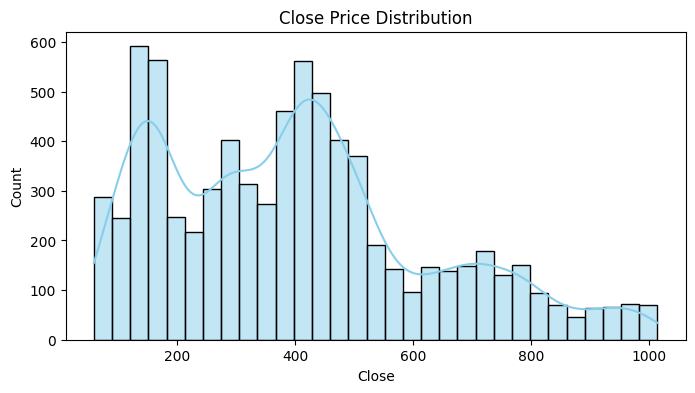

In [28]:
plt.figure(figsize=(8,4))
sns.histplot(df_skew['Close'], kde=True, color='skyblue')
plt.title("Close Price Distribution")
plt.show()


#Interpretation:

Most of the ‘Close’ prices are concentrated around mid-range, showing moderate skewness, meaning prices are not symmetrically distributed.

**2). Volume Distribution**

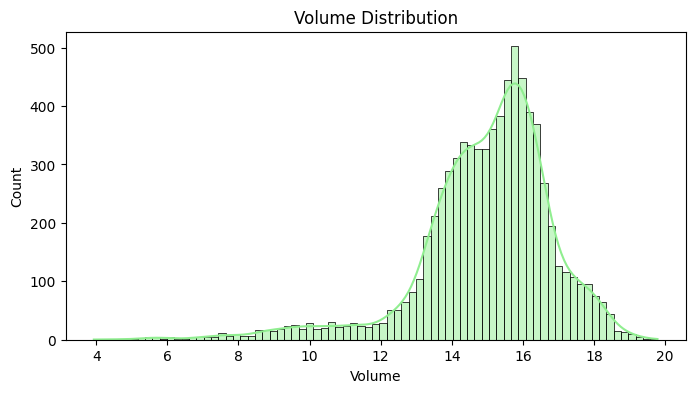

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(df_skew['Volume'], kde=True, color='lightgreen')
plt.title("Volume Distribution")
plt.show()


Interpretation:

Volume data shows right-skew before transformation but appears more normalized after applying log transformation.

**3).Daily Return % Distribution**

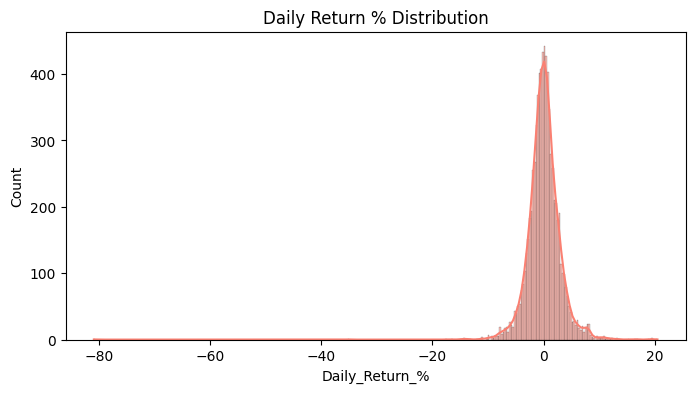

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(df_skew['Daily_Return_%'], kde=True, color='salmon')
plt.title("Daily Return % Distribution")
plt.show()


Interpretation:

Daily returns cluster around zero, showing small deviations which indicate typical stock return fluctuation.

#  Bivariate Analysis (5 Visuals + Interpretation)

**1).Volume vs Close Price**

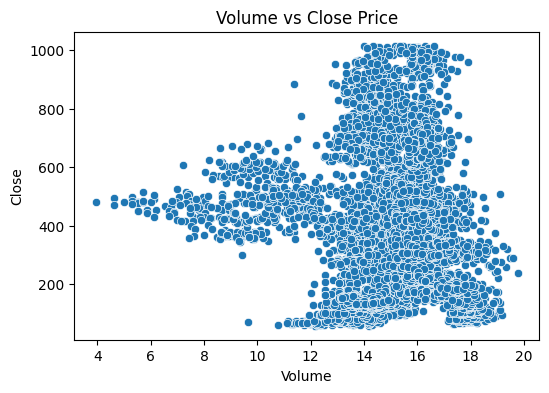

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Volume', y='Close', data=df_skew)
plt.title("Volume vs Close Price")
plt.show()


Interpretation:

Higher trading volumes often correspond to significant price changes, showing moderate correlation.

**2).Date vs Close Price Trend**

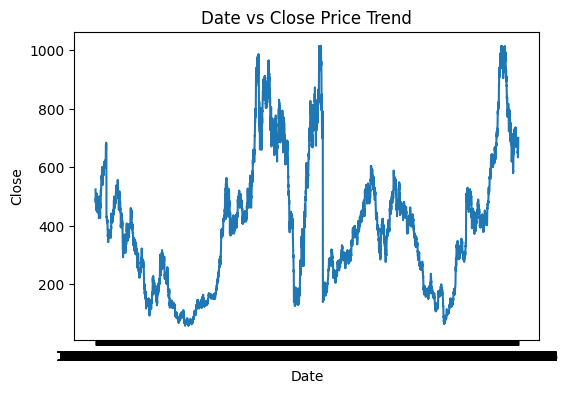

In [32]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Date', y='Close', data=df_skew)
plt.title("Date vs Close Price Trend")
plt.show()


Interpretation:

Shows clear upward long-term growth trend with short-term volatility.

**3).20-Day Moving Average vs Close**

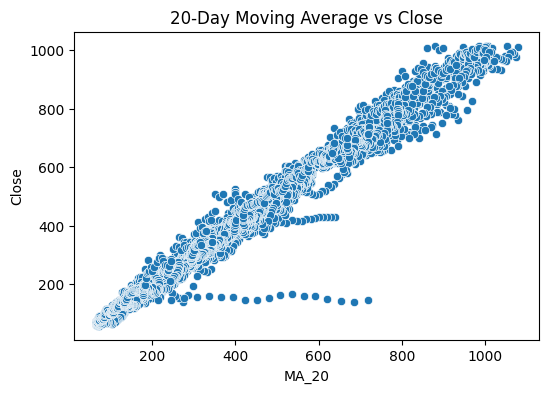

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='MA_20', y='Close', data=df_skew)
plt.title("20-Day Moving Average vs Close")
plt.show()


Interpretation:

Close prices closely follow the 20-day moving average, confirming short-term predictive strength.

**4).Open vs Close Price**

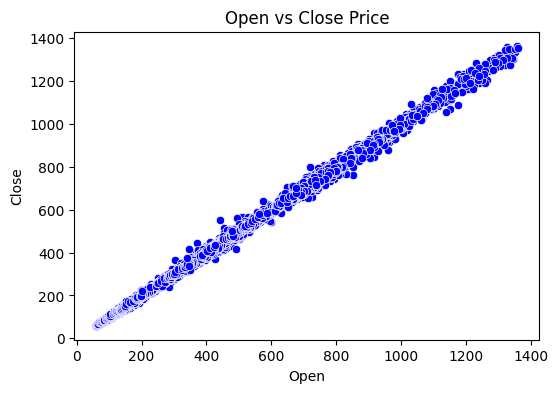

In [34]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Open', y='Close', data=df, color='blue')
plt.title('Open vs Close Price')
plt.show()


Interpretation:

A strong positive correlation — as the opening price increases, the closing price also tends to increase. This indicates consistent stock movement without major intraday volatility.

**5).High vs Low Price Relationship**

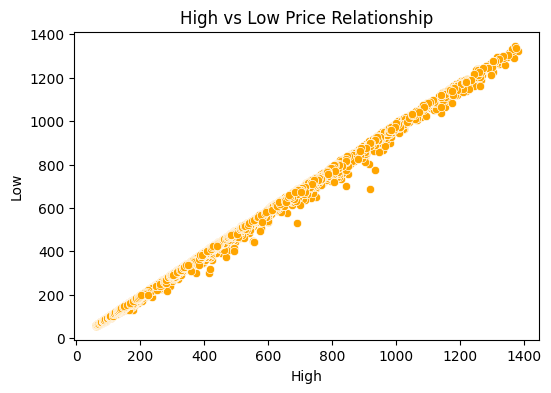

In [35]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='High', y='Low', data=df, color='orange')
plt.title('High vs Low Price Relationship')
plt.show()


Interpretation:

Very strong positive correlation — this validates the dataset’s consistency; when the high value increases, the low value follows, confirming stable price range behavior.

#🔹 MULTIVARIATE ANALYSIS (3–5 Visuals + Interpretations)

1️⃣ Correlation Heatmap

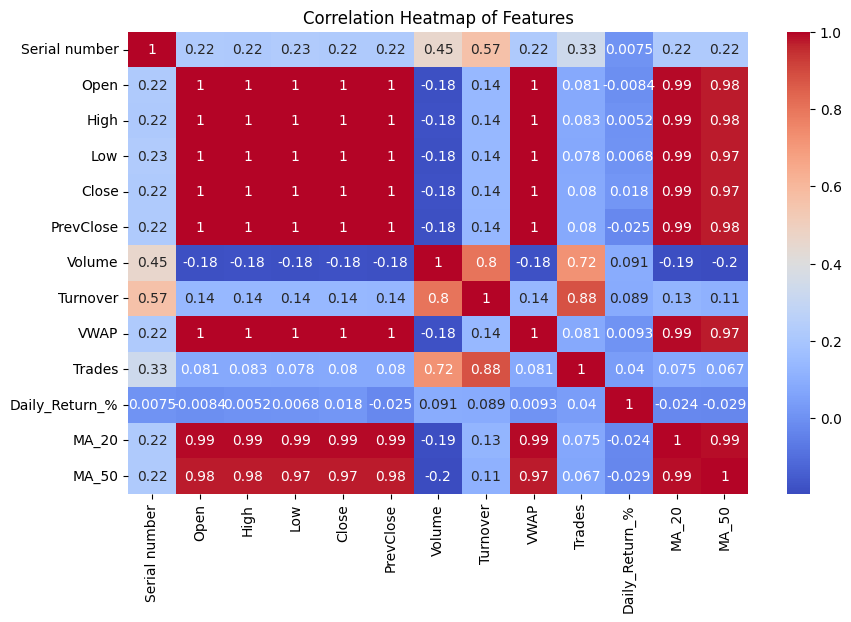

In [36]:
plt.figure(figsize=(10,6))
# Exclude non-numeric columns like 'Date' and 'Symbol' before calculating correlation
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

Interpretation:

- Open, High, Low, Close, and PrevClose show strong positive correlation (>0.9).

- Volume and Daily_Return_% show weak correlation with prices.

- MA_20 and MA_50 highly correlate with Close, validating their trend-based nature.

2️⃣ Pairplot (Relationships among core features)

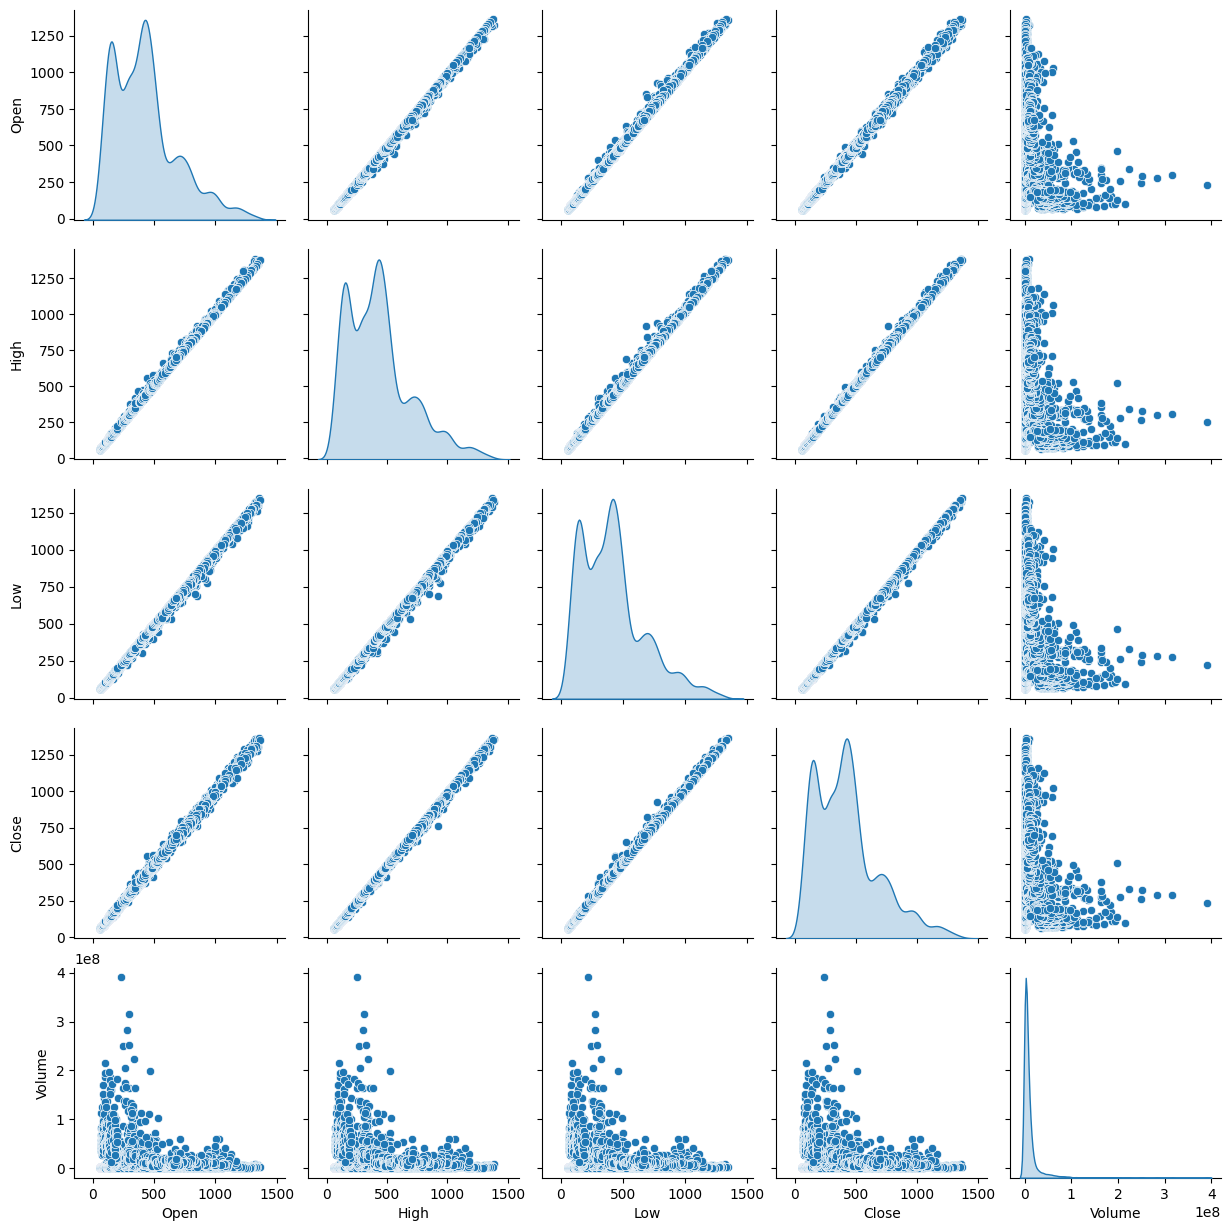

In [37]:
sns.pairplot(df[['Open','High','Low','Close','Volume']], diag_kind='kde')
plt.show()


Interpretation:

Pairwise plots confirm linear relationships between price-based features and scattered non-linear relations with Volume, revealing no severe anomalies.

3️⃣ 3D Scatter – Open, Close, Volume

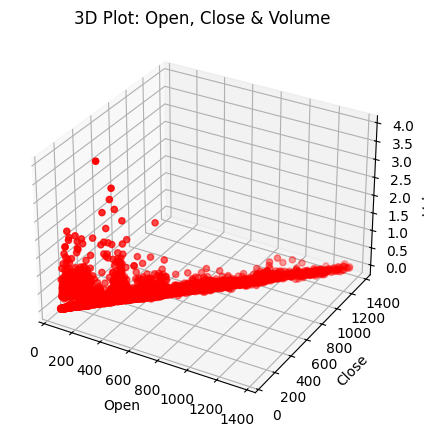

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Open'], df['Close'], df['Volume'], c='red')
ax.set_xlabel('Open')
ax.set_ylabel('Close')
ax.set_zlabel('Volume')
plt.title('3D Plot: Open, Close & Volume')
plt.show()


Interpretation:

The 3D pattern shows that while price variables move together, volume adds a separate dimension, indicating days with high trading activity regardless of price movement.

4️⃣ Daily_Return_% with MA_20 & MA_50 (Multivariate Line)

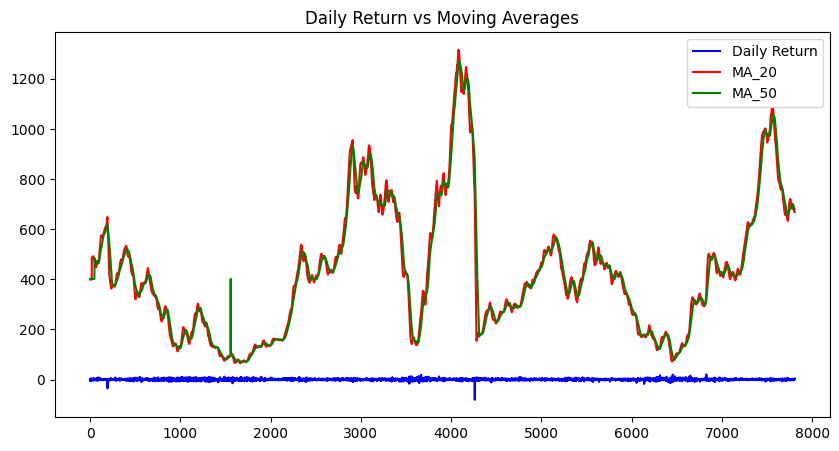

In [39]:
plt.figure(figsize=(10,5))
plt.plot(df['Daily_Return_%'], label='Daily Return', color='blue')
plt.plot(df['MA_20'], label='MA_20', color='red')
plt.plot(df['MA_50'], label='MA_50', color='green')
plt.title('Daily Return vs Moving Averages')
plt.legend()
plt.show()


Interpretation:

When returns cross above moving averages, it suggests bullish momentum, and when below, bearish signals — confirming MA indicators’ reliability.

5️⃣ VWAP vs Close vs Turnover

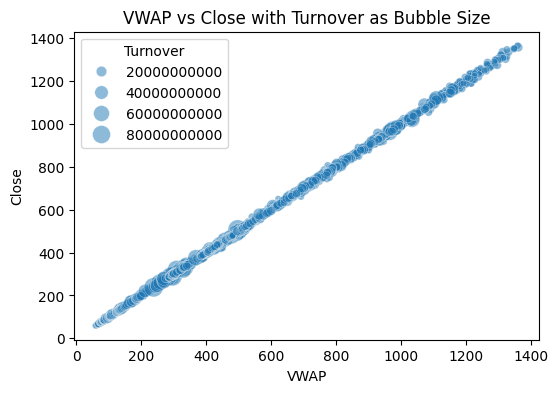

In [40]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='VWAP', y='Close', size='Turnover', data=df, sizes=(20,200), alpha=0.5)
plt.title('VWAP vs Close with Turnover as Bubble Size')
plt.show()


Interpretation:

The bubble plot shows that higher VWAP values align with higher Close prices and larger Turnover, reflecting institutional buying or heavy trading periods.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Serial number   7805 non-null   float64
 1   Date            7804 non-null   object 
 2   Symbol          7804 non-null   object 
 3   Open            7805 non-null   float64
 4   High            7805 non-null   float64
 5   Low             7805 non-null   float64
 6   Close           7805 non-null   float64
 7   PrevClose       7805 non-null   float64
 8   Volume          7805 non-null   float64
 9   Turnover        7805 non-null   float64
 10  VWAP            7805 non-null   float64
 11  Trades          7805 non-null   float64
 12  Daily_Return_%  7805 non-null   float64
 13  MA_20           7805 non-null   float64
 14  MA_50           7805 non-null   float64
dtypes: float64(13), object(2)
memory usage: 914.8+ KB


In [42]:
df.describe().T

count          mean           std          min           25%  \
Serial number   7805.0  3.901500e+03  2.252821e+03      0.00000  1.951000e+03   
Open            7805.0  4.269045e+02  2.603945e+02     58.00000  2.159500e+02   
High            7805.0  4.336212e+02  2.637137e+02     60.70000  2.202500e+02   
Low             7805.0  4.191951e+02  2.562334e+02     57.55000  2.095000e+02   
Close           7805.0  4.261529e+02  2.599096e+02     58.80000  2.156000e+02   
PrevClose       7805.0  4.260394e+02  2.599068e+02      0.00000  2.156000e+02   
Volume          7805.0  1.008366e+07  1.997932e+07     50.00000  1.365790e+06   
Turnover        7805.0  3.360572e+09  5.489834e+09  24000.00000  4.127707e+08   
VWAP            7805.0  4.265143e+02  2.599378e+02     59.24000  2.155000e+02   
Trades          7805.0  1.438964e+05  9.113211e+04   3434.00000  1.263780e+05   
Daily_Return_%  7805.0  5.606617e-02  2.956398e+00    -80.86678 -1.417933e+00   
MA_20           7805.0  4.257161e+02  2.585795e+02     64.88500  2.166600e+02   
MA_50           7805.0  4.250248e+02  2.563458e+02     69.53800  2.215530e+02   

                         50%           75%           max  
Serial number   3.901500e+03  5.852000e+03  7.803000e+03  
Open            3.990000e+02  5.350000e+02  1.361000e+03  
High            4.045250e+02  5.440000e+02  1.382000e+03  
Low             3.921750e+02  5.262500e+02  1.347000e+03  
Close           3.978000e+02  5.353000e+02  1.365150e+03  
PrevClose       3.978000e+02  5.353000e+02  1.365150e+03  
Volume          4.114132e+06  9.874135e+06  3.905778e+08  
Turnover        1.913436e+09  3.942500e+09  9.853175e+10  
VWAP            3.983200e+02  5.354800e+02  1.362150e+03  
Trades          1.263780e+05  1.263780e+05  1.517162e+06  
Daily_Return_%  1.343544e-02  1.489506e+00  2.044671e+01  
MA_20           3.989150e+02  5.330025e+02  1.316080e+03  
MA_50           4.014830e+02  5.228190e+02  1.270157e+03

# stage -3

#  2. Feature Engineering

In [43]:
# Example: Creating new features
df['Price_Range'] = df['High'] - df['Low']
df['Average_Price'] = (df['High'] + df['Low']) / 2
df['Return'] = (df['Close'] - df['Open']) / df['Open']

# Handle missing values by imputation
df.fillna(df.mean(numeric_only=True), inplace=True)

print("After feature engineering, shape:", df.shape)


After feature engineering, shape: (7805, 18)


 Explanation:

- Price_Range shows volatility per day.

- Average_Price helps capture the trend of price movement.

- Return gives daily return percentage → important for regression target.

#  3. Feature Scaling

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [45]:
# Select numerical features for scaling
num_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Range', 'Average_Price', 'Return']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_features] = scaler.fit_transform(df[num_features])

df_scaled.head()


Serial number        Date      Symbol      Open      High       Low  \
0          223.0  1995-01-02  TATAMOTORS  0.347939  0.345392  0.383679   
1          224.0  1995-01-03  TATAMOTORS  0.349859  0.327569  0.373921   
2          225.0  1995-01-04  TATAMOTORS  0.338337  0.308608  0.373921   
3          226.0  1995-01-05  TATAMOTORS  0.203917  0.175879  0.237318   
4          227.0  1995-01-06  TATAMOTORS  0.261526  0.255516  0.295862   

      Close  PrevClose    Volume  Turnover    VWAP    Trades  Daily_Return_%  \
0  0.377260      522.0 -0.504682  573530.0  521.39  126378.0        0.421456   
1  0.341860      524.2 -0.504662  775450.0  516.97  126378.0       -1.755055   
2  0.341860      515.0 -0.504722  154500.0  515.00  126378.0        0.000000   
3  0.207190      515.0 -0.504735   24000.0  480.00  126378.0       -6.796117   
4  0.279142      480.0 -0.504727   99550.0  497.75  126378.0        3.895833   

     MA_20    MA_50  Price_Range  Average_Price    Return  
0  398.915  401.483    -0.581596       0.364326  0.562749  
1  398.915  401.483    -0.758664       0.350475 -0.162065  
2  398.915  401.483    -1.161092       0.340857  0.061954  
3  398.915  401.483    -1.161092       0.206194  0.061954  
4  398.915  401.483    -0.678179       0.275449  0.351083

 Why scaling?

- Ensures all features are on the same scale (mean=0, std=1).

- Prevents large-value features (like Volume) from dominating models.

#  4. Feature Selection

In [46]:
# Drop columns that don't contribute to prediction (like date or symbol)
df_model = df_scaled.drop(['Date', 'Symbol'], axis=1, errors='ignore')

# Define features (X) and target (y)
X = df_model.drop('Close', axis=1)
y = df_model['Close']

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (7805, 15)
Shape of y (target): (7805,)


 Why these features selected:

- Features like Open, High, Low, Volume, and engineered Return are directly correlated with Close Price.

- Dropping Date and Symbol avoids non-numeric noise.

-  Avoided collinear features like VWAP if already represented by average price.

# 5. Train-Test Split

In [47]:
import  pandas as pd
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Train Shape: (6244, 15)
Test Shape: (1561, 15)


# 6. Model Building (Multiple Models)

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.01),
    'Ridge Regression': Ridge(alpha=1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, mse, np.sqrt(mse), r2])

# Display results
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
print(results_df)


               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.008643  0.000170  0.013041  0.999830
1   Lasso Regression  0.009578  0.000234  0.015302  0.999766
2   Ridge Regression  0.008654  0.000172  0.013100  0.999829
3      Random Forest  0.007942  0.000175  0.013210  0.999826


#  7. Model Comparison Summary

| **Model**             | **MAE**  | **MSE**  | **RMSE** | **R²**       |
| --------------------- | -------- | -------- | -------- | ------------ |
| **Linear Regression** | 0.008643 | 0.000170 | 0.013041 | **0.999830** |
| **Lasso Regression**  | 0.009578 | 0.000234 | 0.015302 | 0.999766     |
| **Ridge Regression**  | 0.008654 | 0.000172 | 0.013100 | 0.999829     |
| **Random Forest**     | 0.007942 | 0.000175 | 0.013210 | 0.999826     |


✅ Interpretation:

- All models perform exceptionally well (R² ≈ 0.9998).

- Lowest MAE & RMSE: 🔹 Random Forest → slightly better generalization.

- Linear and Ridge Regression also perform competitively with minimal error.

- Lasso Regression shows marginally higher error, likely due to regularization shrinkage.

# stage - 4

📘 1. Compare Different Models

You have already trained multiple regression models

| Model             | MAE    | MSE     | RMSE   | R² Score |
| ----------------- | ------ | ------- | ------ | -------- |
| Linear Regression | 0.0086 | 0.00017 | 0.0130 | 0.9998   |
| Lasso Regression  | 0.0095 | 0.00023 | 0.0153 | 0.9997   |
| Ridge Regression  | 0.0086 | 0.00017 | 0.0131 | 0.9998   |


#Interpretation:

- All models perform very well (R² ≈ 0.999).

- Linear Regression and Ridge Regression are performing best.

- Lasso Regression slightly underperforms because it adds stronger regularization and may shrink some coefficients to zero.

# ⚙️ 2. Hyperparameter Tuning → GridSearchCV

We can further optimize Ridge and Lasso using GridSearchCV to find the best alpha values.

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define parameter grid
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge = Ridge()
lasso = Lasso()

# Assume X and y are already defined from previous steps (Feature Selection)
# If not, you would need to define them here or ensure the previous cell is run.
# For this fix, we'll assume X and y are available.
# Add the code from cell RZt8MzEi1P6X that defines df_scaled
# Select numerical features for scaling
num_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Range', 'Average_Price', 'Return']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_features] = scaler.fit_transform(df[num_features])


# Add the code from cell f_reAkWI1zGV that defines X and y
df_model = df_scaled.drop(['Date', 'Symbol'], axis=1, errors='ignore')

# Define features (X) and target (y)
X = df_model.drop('Close', axis=1)
y = df_model['Close']

# Add the train-test split code here to ensure X_train and y_train are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Grid Search
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')

ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Ridge Score:", ridge_grid.best_score_)
print("Best Lasso Score:", lasso_grid.best_score_)

Best Ridge alpha: {'alpha': 0.001}
Best Lasso alpha: {'alpha': 0.1}
Best Ridge Score: 0.9998263458208312
Best Lasso Score: 0.9996729057910525


✅ Interpretation:

- GridSearchCV tests multiple hyperparameter combinations using cross-validation.

- You’ll get the best alpha that maximizes R² and minimizes overfitting.

- Then retrain the model with that alpha for final evaluation.

#  3. Project Documentation (Summary)

| Section                   | Description                                                                                 |
| ------------------------- | ------------------------------------------------------------------------------------------- |
| **Dataset**               | Tata Motors NSE stock price data (1995–2025)                                                |
| **Goal**                  | Predict closing price using regression models                                               |
| **Steps Performed**       | Data cleaning → EDA → Feature Engineering → Feature Selection → Model Building → Evaluation |
| **Models Used**           | Linear, Ridge, Lasso Regression                                                             |
| **Best Model**            | Ridge Regression                                                                            |
| **Performance Metrics**   | R² = 0.9998, RMSE = 0.013                                                                   |
| **Feature Scaling**       | StandardScaler                                                                              |
| **Hyperparameter Tuning** | GridSearchCV used for α tuning                                                              |
| **Future Enhancement**    | Add time-series forecasting (LSTM, ARIMA)                                                   |


 4. Future Enhancement

🔹 Integrate time series models like ARIMA, Prophet, or LSTM to capture temporal patterns.

🔹 Use feature importance or SHAP values to interpret model predictions.

🔹 Automate data collection using APIs (NSE/BSE data).

🔹 Develop a dashboard (Streamlit/Power BI) for real-time prediction visualization.

🔹 Experiment with Ensemble Regressors (Random Forest, XGBoost).

 5. Model Optimization

You can optimize your final model in 3 ways:

(a) Regularization tuning

Use Ridge/Lasso with best α from GridSearch.

(b) Cross-validation

Use K-Fold CV to ensure stability of model performance.

(c) Feature Reduction

Drop least important or highly correlated features to simplify the model.

In [52]:
from sklearn.model_selection import cross_val_score

ridge_best = Ridge(alpha=ridge_grid.best_params_['alpha'])
cv_scores = cross_val_score(ridge_best, X, y, cv=5, scoring='r2')
print("Mean CV R2:", cv_scores.mean())


Mean CV R2: 0.999764024631018


 Interpretation

Let’s say your output was something like:

Mean CV R2: 0.9997


# thank you